In [36]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
x_data=np.linspace(0.0,10.0,1000000)

In [38]:
noise=np.random.randn(len(x_data))

In [39]:
y_true=0.5*x_data+5+noise

In [40]:
x_df=pd.DataFrame(data=x_data,columns=["X data"])


In [41]:
y_df=pd.DataFrame(data=y_true,columns=["Y"])


In [42]:
my_data=pd.concat([x_df,y_df],axis=1)

In [43]:
my_data.head()

,X data,Y
0,0.00000,5.434304
1,0.00001,6.560848
2,0.00002,4.897949
3,0.00003,4.930906
4,0.00004,4.725879


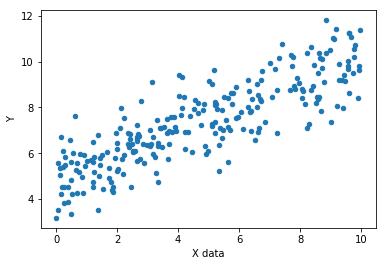

In [44]:
my_data.sample(n=250).plot(kind='scatter',x='X data',y='Y')

In [45]:
batch_size=8
m=tf.Variable(np.random.randn(2)[1])
b=tf.Variable(np.random.randn(2)[0])


In [46]:
xph=tf.placeholder(tf.float64,[batch_size])
yph=tf.placeholder(tf.float64,[batch_size])

In [47]:
y_model=m*xph+b

In [48]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [49]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [50]:
init=tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])

In [52]:
model_b

4.935837865870869

In [53]:
model_m

0.49845396745513304

In [54]:
y_hat=x_data*model_m+model_b

In [ ]:
my_data.sample(n=250).plot(kind='scatter',x='X data',y='Y')